# **<center><font color=brown>Exploratory Data Analysis on Titanic Dataset</font></center>**

# **<font color=purple>Importing the Dependencies</font>**

In [36]:
#importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder #library to handle categorical data
from sklearn.preprocessing import StandardScaler #library for feature scaling
import warnings #ignore warnings
warnings.filterwarnings('ignore')

# **<font color=purple>Importing Dataset</font>**

In [37]:
#loading the titanic dataset from csv file to pandas dataframe
df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/7. Dataset/titanic.csv')

# **<font color=purple>Introductory Details About Data</font>**

### <font color=blue>Viewing the first few rows of the dataset</font>

In [38]:
#printing the first five rows of the dataframe
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## <font color=blue>Viewing the last few rows of the dataset</font>

In [39]:
#printing the last five rows of the dataframe
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


### <font color=blue>Viewing the dimensionality of the dataset</font>

In [40]:
#total number of rows and column in the dataset
df.shape

(891, 12)

### **Observation**<br>- Dataset comprises 891 observation(rows) and 12 features(columns)<br>- Out of the 12, one is the target variable and rest 11 are input varibles.

### <font color=blue>Getting Concise summary of the dataset</font>

In [41]:
#columns and their corresponding datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


### **Observation**<br> - The data has float, integer and object values

### <font color=blue>Getting descriptive statistics of the data</font>

In [42]:
#statistics summary
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


# **<font color=purple>Handling Missing Data</font>**

### <font color=blue>Check Null values in the dataset</font>

In [43]:
#checking null values in dataset
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

### <font color=blue>Visualizing the Missing values</font>

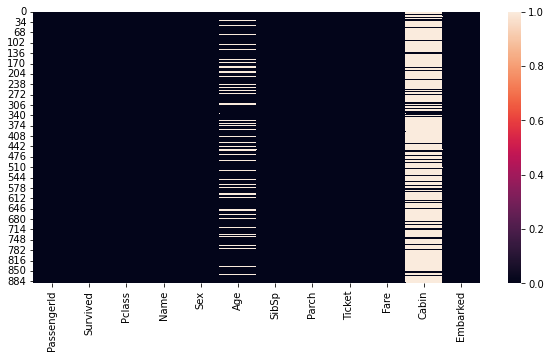

In [44]:
plt.figure(figsize=(10,5))
sns.heatmap(df.isnull())
plt.show()

### **Observation**<br>- There are 177 missing value in Age column, 687 missing values in Cabin column and 2 missing value in Embarked column

### <font color=blue>Check Non Numeric Column in the Dataset</font>

In [45]:
#checking datatypes of each column
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

### <font color=blue>Check Null Value Percentage for Age column</font>

In [46]:
df['Age'].isnull().sum()*100/df.shape[0]

19.865319865319865

### <font color=blue>Find the mean of Age column</font>

In [47]:
m=df['Age'].mean()
print("Mean value of Age Column : ",m)

Mean value of Age Column :  29.69911764705882


### <font color=blue>Fill Null values with mean of Age column</font>

In [48]:
df['Age'].fillna(m,inplace=True)

### <font color=blue>Check Null Value Percentage for Cabin column</font>

In [49]:
df['Cabin'].isnull().sum()*100/df.shape[0]

77.10437710437711

### <font color=blue>We will delete the cabin column as null value percentage is more than 50% and is not important for analysis</font>

In [50]:
#deleting cabin Column
df.drop('Cabin',axis=1,inplace=True)

### <font color=blue>Embarked column has 2 null value, since it is categorical type will check most frequency count</font> 

In [51]:
df[pd.isnull(df['Embarked'])]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,NaN


In [52]:
df['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

### **Observation**<br>- Since the most value count is 644, so we replaced NaN with S

In [53]:
df['Embarked'].fillna('S',inplace=True)

In [54]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

### <font color=blue>Visualizing the Missing values</font>

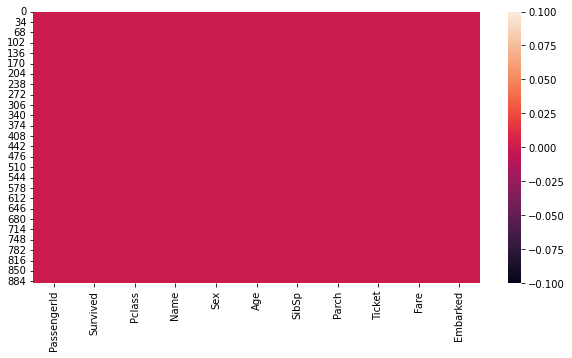

In [55]:
#visualizing null values
plt.figure(figsize=(10,5))
sns.heatmap(df.isnull())
plt.show()

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


### **Observation**<br>- We see all the column in dataset are free from Null values and 7 of them are numeric while 4 are object types

# **<font color=purple>Handling Categorical Data</font>**

In [57]:
#checking datatypes of each column
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Embarked        object
dtype: object

### <font color=blue>Seperate the Numerical data (int and float) and categorical data (object)</font>

In [58]:
#creating first dataframe df_cat which hold object type data means categorical data
df_cat=df.select_dtypes(object)

In [59]:
#checking datatypes of df_cat
df_cat.dtypes 

Name        object
Sex         object
Ticket      object
Embarked    object
dtype: object

In [60]:
#creating second dataframe df_num which hold numerical data (int and float)
df_num=df.select_dtypes(['int64','float64'])

In [61]:
#checking datatypes of df_num
df_num.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Age            float64
SibSp            int64
Parch            int64
Fare           float64
dtype: object

### <font color=blue>Convert all Categorical Data into Numerical Data</font>

In [62]:
for col in df_cat:
  #create object of LabelEncoder class
  le=LabelEncoder()
  df_cat[col]=le.fit_transform(df_cat[[col]])
  

In [63]:
df_cat.head()

,Name,Sex,Ticket,Embarked
0,108,1,523,2
1,190,0,596,0
2,353,0,669,2
3,272,0,49,2
4,15,1,472,2


In [64]:
#checking datatypes of df_cat dataframe
df_cat.dtypes

Name        int64
Sex         int64
Ticket      int64
Embarked    int64
dtype: object

### <font color=blue>Merge Numerical and Categorical Data</font>

In [65]:
#concatenation of both dataset df_num and df_cat and hold new dataset df_new
df_new = pd.concat([df_cat,df_num],axis=1)
df_new.head()

,Name,Sex,Ticket,Embarked,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,108,1,523,2,1,0,3,22.0,1,0,7.2500
1,190,0,596,0,2,1,1,38.0,1,0,71.2833
2,353,0,669,2,3,1,3,26.0,0,0,7.9250
3,272,0,49,2,4,1,1,35.0,1,0,53.1000
4,15,1,472,2,5,0,3,35.0,0,0,8.0500


### **Observation**<br>- We see all the columns of our dataset are free from Categorical datatype

# **<font color=purple>Feature Scaling</font>**

In [66]:
#checking columns in df_new dataframe
df_new.columns

Index(['Name', 'Sex', 'Ticket', 'Embarked', 'PassengerId', 'Survived',
       'Pclass', 'Age', 'SibSp', 'Parch', 'Fare'],
      dtype='object')

In [67]:
#droping Survived column from df_new and assigning in X variable
X = df_new.drop('Survived',axis=1)
X.head()

,Name,Sex,Ticket,Embarked,PassengerId,Pclass,Age,SibSp,Parch,Fare
0,108,1,523,2,1,3,22.0,1,0,7.2500
1,190,0,596,0,2,1,38.0,1,0,71.2833
2,353,0,669,2,3,3,26.0,0,0,7.9250
3,272,0,49,2,4,1,35.0,1,0,53.1000
4,15,1,472,2,5,3,35.0,0,0,8.0500


In [68]:
#from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X = ss.fit_transform(X)
print(X)

[[-1.31021659  0.73769513  0.91896631 ...  0.43279337 -0.47367361
  -0.50244517]
 [-0.99141018 -1.35557354  1.28262456 ...  0.43279337 -0.47367361
   0.78684529]
 [-0.35768524 -1.35557354  1.64628282 ... -0.4745452  -0.47367361
  -0.48885426]
 ...
 [-0.12441226 -1.35557354  1.67617254 ...  0.43279337  2.00893337
  -0.17626324]
 [-1.41518943  0.73769513 -1.64656796 ... -0.4745452  -0.47367361
  -0.04438104]
 [-0.87477369  0.73769513  0.63501397 ... -0.4745452  -0.47367361
  -0.49237783]]
